In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
# Generating a dataset with two moon-shaped clusters
# x: data points, y: cluster labels, noise: adds randomness to data
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

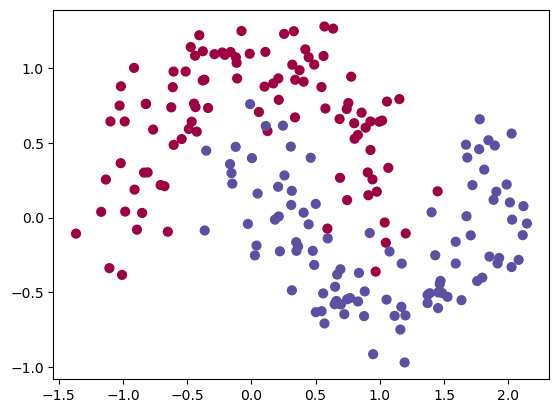

In [3]:
# Plotting the data points:
# x[:,0] and x[:,1] are the x and y coordinates of each point
# 's=40' sets the size of each point
# 'c=y' colors the points based on their cluster labels
# 'cmap=plt.cm.Spectral' uses a specific color map for coloring
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral)

plt.show()

In [4]:
# Converting x to a PyTorch FloatTensor for neural network processing:
x = torch.FloatTensor(x)

# Converting y to a PyTorch LongTensor, typically used for labels:
y = torch.LongTensor(y)

In [5]:
# Defining a feedforward neural network class using PyTorch:

class FeedForward(torch.nn.Module):
    # Constructor for initializing the network layers:
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward,self).__init__()
        
        # First layer: input to hidden:
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        
        # Second layer: hidden to output:
        self.out = nn.Linear(hidden_neurons,output_neurons)
        
    # Defining the forward pass of the network:
    def forward(self, x):
        # Applying the hidden layer and ReLU activation:
        x = self.hidden(x)
        x = F.relu(x)
        
        # Output layer:
        x = self.out(x)
        
        return x

In [6]:
# Creating an instance of the FeedForward network with specified neuron counts:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)

# Setting up the optimizer with Stochastic Gradient Descent and a learning rate of 0.02:
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)

# Using Cross Entropy Loss as the loss function for the network:
loss_function = torch.nn.CrossEntropyLoss()

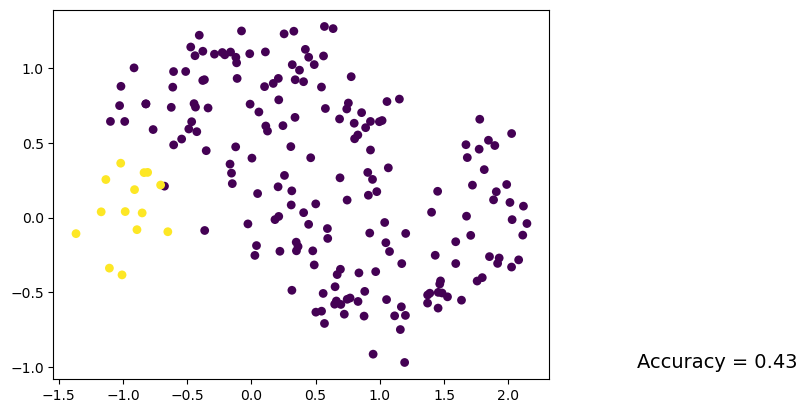

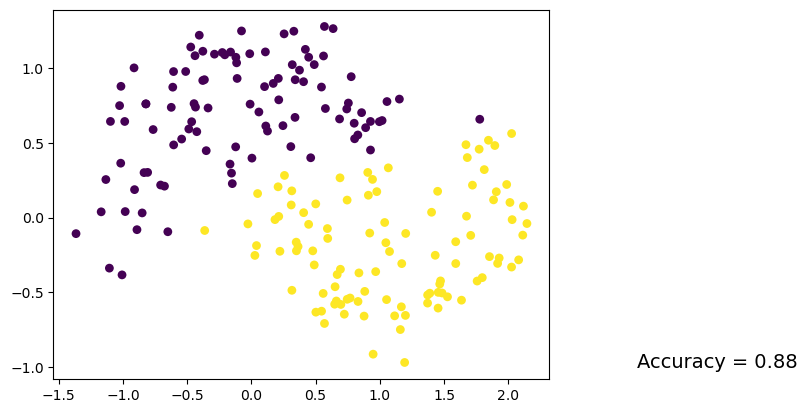

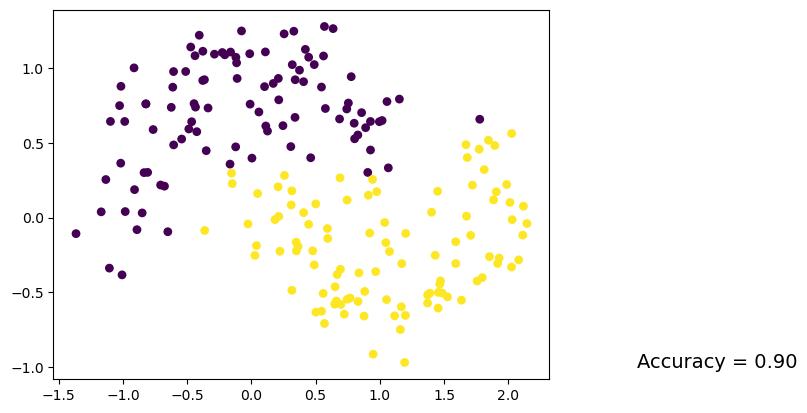

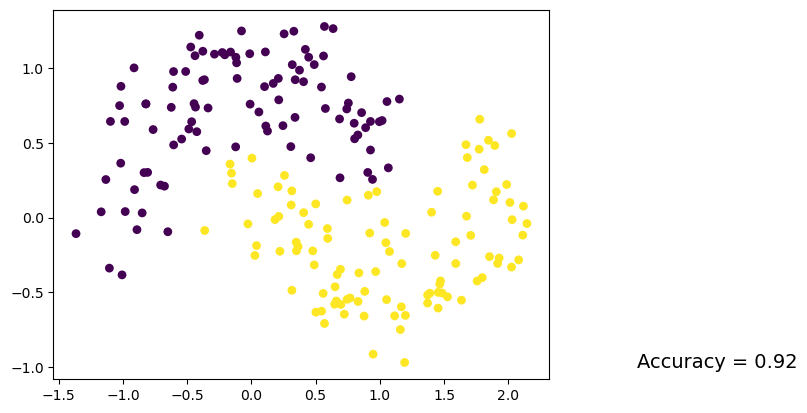

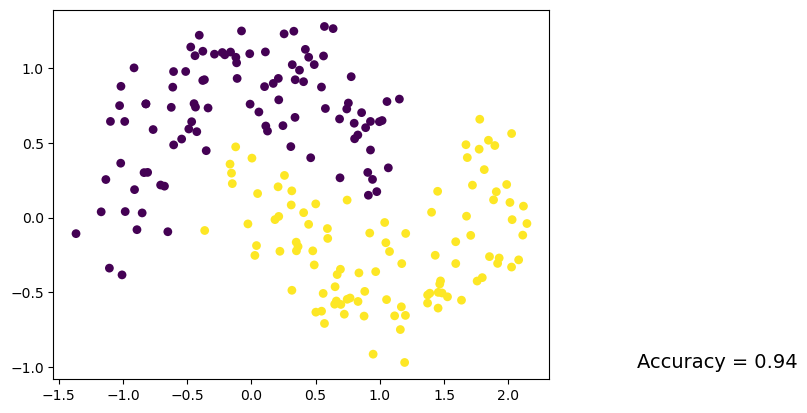

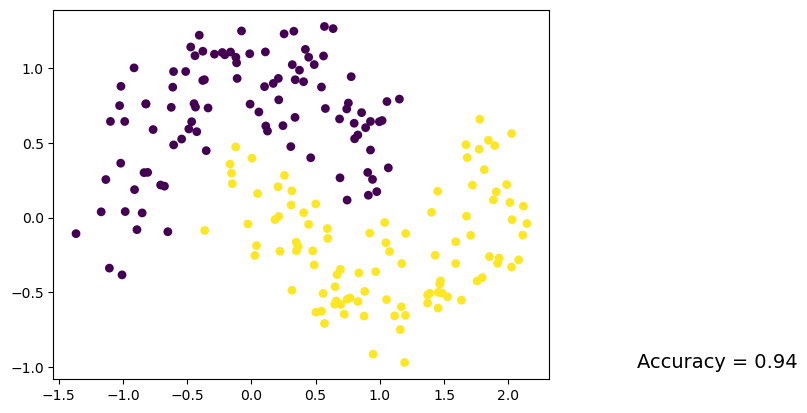

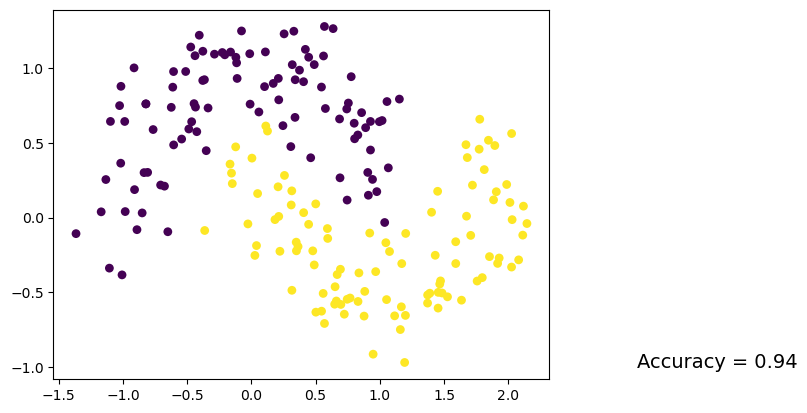

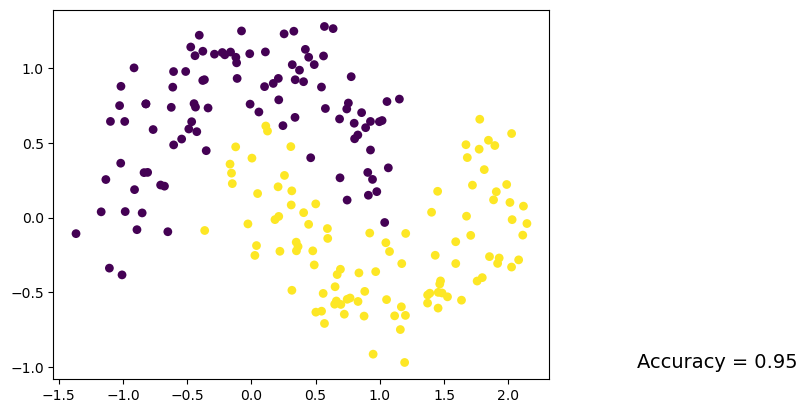

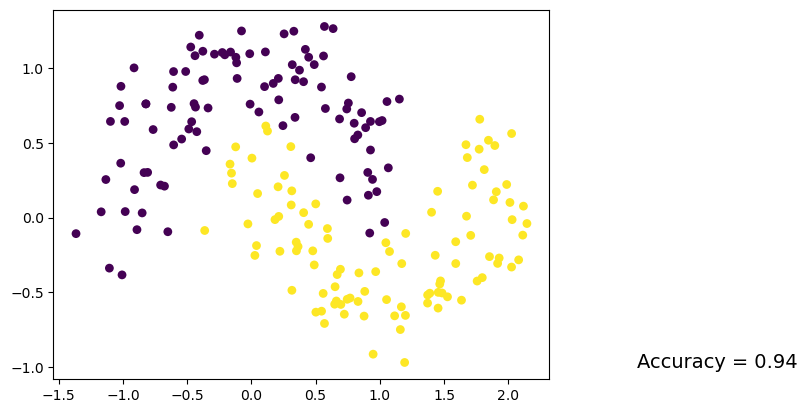

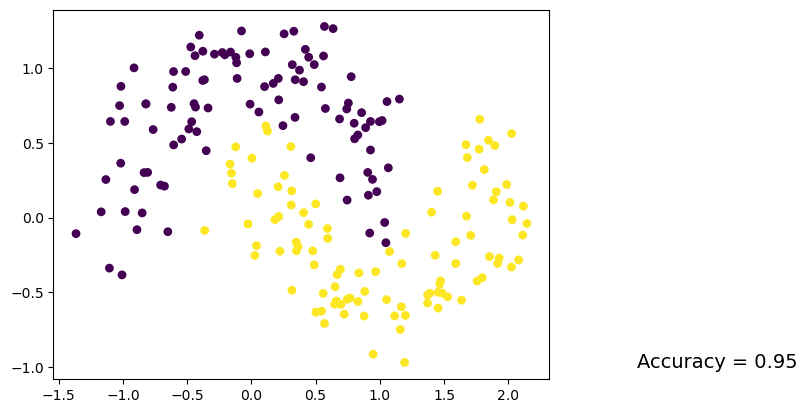

In [7]:
# Enabling interactive mode for plotting:
plt.ion()

# Training loop for 10000 epochs:
for epoch in range(10000):
    # Forward pass: Compute predicted output by passing x to the network:
    out = network(x)
    
    # Compute loss:
    loss = loss_function(out,y)
    
    # Zero gradients, perform a backward pass, and update the weights:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Visualizing the training process every 1000 epochs:
    if epoch % 1000 == 0:
        # Get predictions and convert to numpy for plotting:
        max_value, prediction = torch.max(out,1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        
        # Plotting the points and updating accuracy text:
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

# Disabling interactive mode and showing the final plot
plt.ioff()        
plt.show()